In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# EXERCISE 1: Data Analysis using CEREALS dataset

In [2]:
df=pd.read_csv('week_2\Cereals.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100NaturalBran,Q,C,120,3,5,15,2.0,8,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7,5,320,25,3,1.0,0.33,59.425505
2,All-BranwithExtraFiber,K,C,50,4,0,140,14.0,8,0,330,25,3,1.0,0.50,93.704912
3,AlmondDelight,R,C,110,2,2,200,1.0,14,8,?,25,3,1.0,0.75,34.384843
4,AppleCinnamonCheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541


### 1. Cross tabulate the type of cereal (hot vs cold) against the manufacturer

In [3]:
pd.crosstab(df['type'], df['mfr'])

mfr,A,G,K,N,P,Q,R
type,,,,,,,
C,0,22,23,4,9,7,8
H,1,0,0,1,0,1,0


### 2.Which is the cereal with the best rating, worst rating?

In [4]:
max = df['rating'].max()
min = df['rating'].min()
top = df[df['rating'] == max]['name'].values[0]
bottom=df[df['rating'] == min]['name'].values[0]
print("Highest Rated Brand: "+top+"\nLowest Rated Brand: "+bottom)

Highest Rated Brand: All-BranwithExtraFiber
Lowest Rated Brand: CapnCrunch


### 3. Plot a side-by-side boxplot comparing the consumer rating of hot vs. cold cereals. 

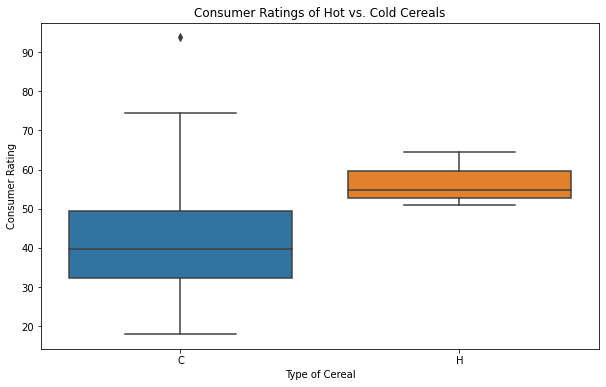

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='rating', data=df)
plt.title('Consumer Ratings of Hot vs. Cold Cereals')
plt.xlabel('Type of Cereal')
plt.ylabel('Consumer Rating')
plt.show()

### 4. Is there a relation between sugars, calories, carbs, and fat?

In [6]:
df['sugars'] = pd.to_numeric(df['sugars'], errors='coerce')
df['carbo'] = pd.to_numeric(df['carbo'], errors='coerce')

In [7]:
columns_of_interest = ['sugars', 'carbo', 'calories', 'fat']
df_subset = df[columns_of_interest]
df_subset.corr()

,sugars,carbo,calories,fat
sugars,1.000000,-0.501086,0.574758,0.302610
carbo,-0.501086,1.000000,0.207539,-0.313635
calories,0.574758,0.207539,1.000000,0.510630
fat,0.302610,-0.313635,0.510630,1.000000


### 5.Which manufacturers produce cereal with highest calories?

In [8]:
max = df['calories'].max()
min = df['calories'].min()
top = df[df['calories'] == max]['name'].values[0]
bottom=df[df['calories'] == min]['name'].values[0]
print("Highest Caloric Brand: "+top+"\nLowest Caloric Brand: "+bottom)

Highest Caloric Brand: MueslixCrispyBlend
Lowest Caloric Brand: All-BranwithExtraFiber


### 6. Use correlation tests and visualization to identify if the two variables calories and consumer rating associated?

In [9]:
corr_coefficient, p_value = stats.pearsonr(df['calories'], df['rating'])
print(f'Pearson Correlation Coefficient: {corr_coefficient:.2f}')
print(f'P-value: {p_value:.4f}')

Pearson Correlation Coefficient: -0.67
P-value: 0.0000


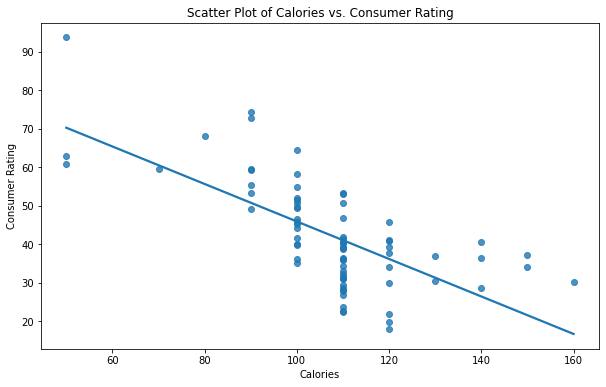

In [10]:
plt.figure(figsize=(10, 6))
sns.regplot(x='calories', y='rating', data=df, ci=None)
plt.title('Scatter Plot of Calories vs. Consumer Rating')
plt.xlabel('Calories')
plt.ylabel('Consumer Rating')
plt.show()

### 7.Use correlation tests and visualization to identify if the two variables shelf and consumer rating associated?

In [11]:
corr_coefficient, p_value = stats.pearsonr(df['shelf'], df['rating'])
print(f'Pearson Correlation Coefficient: {corr_coefficient:.2f}')
print(f'P-value: {p_value:.4f}')

Pearson Correlation Coefficient: 0.00
P-value: 0.9865


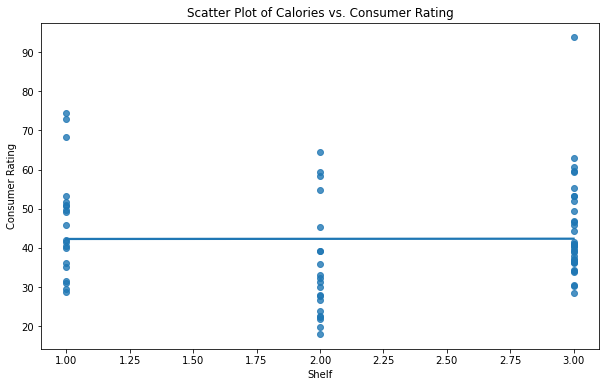

In [12]:
plt.figure(figsize=(10, 6))
sns.regplot(x='shelf', y='rating', data=df, ci=None)
plt.title('Scatter Plot of Calories vs. Consumer Rating')
plt.xlabel('Shelf')
plt.ylabel('Consumer Rating')
plt.show()

### 8. Is there a relation between manufacturer and rating?

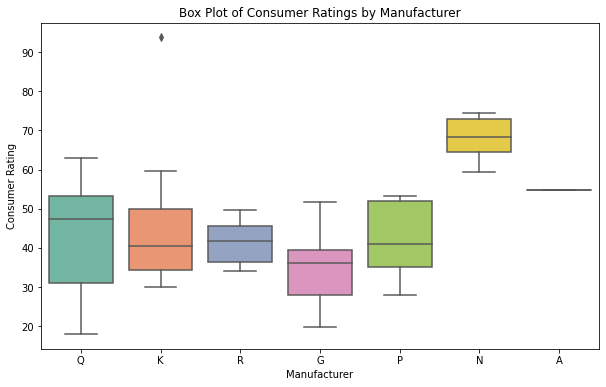

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mfr', y='rating', data=df, palette='Set2')
plt.title('Box Plot of Consumer Ratings by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Consumer Rating')
plt.show()

This shows that there is a relation between the manufacturer and rating as "N" has higher ratings then the rest of the group.

### 9.Which nutrients are essential for a good rating for a cereal?

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      76 non-null     object 
 1   mfr       76 non-null     object 
 2   type      76 non-null     object 
 3   calories  76 non-null     int64  
 4   protein   76 non-null     int64  
 5   fat       76 non-null     int64  
 6   sodium    76 non-null     int64  
 7   fiber     76 non-null     float64
 8   carbo     75 non-null     float64
 9   sugars    75 non-null     float64
 10  potass    76 non-null     object 
 11  vitamins  76 non-null     int64  
 12  shelf     76 non-null     int64  
 13  weight    76 non-null     float64
 14  cups      76 non-null     float64
 15  rating    76 non-null     float64
dtypes: float64(6), int64(6), object(4)
memory usage: 9.6+ KB


In [15]:
data= df.iloc[:,4:12]
df_subset = pd.concat([data, df[['rating']]], axis=1)
correlation_matrix = df_subset.corr()
print(correlation_matrix['rating'])

protein     0.453683
fat        -0.418439
sodium     -0.402077
fiber       0.557242
carbo       0.161357
sugars     -0.776181
vitamins   -0.242516
rating      1.000000
Name: rating, dtype: float64


### 10. Design a Linear regression model to predict the rating of a cereal based on top 3 related nutrients. Tabulate the accuracy of the model using an 80, 20 split

In [16]:
rating_correlation = correlation_matrix['rating'].drop('rating')
top_nutrients = rating_correlation.abs().nlargest(3).index.tolist()
print("Top 3 related nutrients:", top_nutrients)

Top 3 related nutrients: ['sugars', 'fiber', 'protein']


In [17]:
X = df[top_nutrients]
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train = X_train.fillna(0)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 42.5397352010683
R^2 Score: 0.6053439309787277


# EXERCISE 2 – Descriptive Analytics and Visualization using Matplotlib, Seaborn: (Cross tabulation, distributions, Multi-variate analysis, Various Plots)

In [20]:
df=pd.read_csv('matches.csv')

In [21]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### 1) Count the total number of matches conducted in the year 2008

In [22]:
matches_2008 = df[df['season'] == 2008]
matches_2008.shape[0]

58

### 2) Find the city name where maximum and minimum number of matches conducted

In [23]:
city_match = df['city'].value_counts()
city_max = city_match.idxmax()
city_min = city_match.idxmin()
print("City with highest matches: "+city_max+"\nCity with lowest matches: "+city_min)

City with highest matches: Mumbai
City with lowest matches: Bloemfontein


### 3) Find total count of matches city wise.

In [24]:
df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

### 4) Find the Team which is maximum and minimum toss winner.

In [25]:
toss_win = df['toss_winner'].value_counts()
team_max =toss_win.idxmax()
team_min = toss_win.idxmin()
print("Maximum toss winner: "+team_max+"\nMinimum toss winner: "+team_min)

Maximum toss winner: Mumbai Indians
Minimum toss winner: Rising Pune Supergiant


### 5) Check the toss decision that the team has taken

In [26]:
 df['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

### 6) Count the total number of normal and tie matches.

In [42]:
ties = df[df['result'] == 'tie']
pd.concat([ties['team1'], ties['team2']]).unique()
print("Teams where the match result was a tie:")
ties.head(9)

Teams where the match result was a tie:


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
33,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
125,126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN
189,190,2010,Chennai,2010-03-21,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN
387,388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi,NaN
400,401,2013,Bangalore,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni,NaN
475,476,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN
535,536,2015,Ahmedabad,2015-04-21,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera",M Erasmus,S Ravi,NaN
705,11146,2019,Delhi,30/03/19,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,tie,0,Delhi Capitals,0,0,P Shaw,Feroz Shah Kotla Ground,Anil Dandekar,Nitin Menon,Marais Erasmus
746,11342,2019,Mumbai,02/05/19,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium,S Ravi,O Nandan,Nanda Kishore


### 8) Find the Team Name Who Won the Match by Highest Runs

In [28]:
max_runs = df['win_by_runs'].max()
team_max_runs = df[df['win_by_runs'] == max_runs]
print(team_max_runs['winner'].unique())

['Mumbai Indians']


### 9) Find the team name who won the match by lowest runs.

In [29]:
min_runs = df['win_by_runs'].min()
team_min_runs = df[df['win_by_runs'] == min_runs]
print(team_min_runs['winner'].unique())

['Rising Pune Supergiant' 'Kolkata Knight Riders' 'Kings XI Punjab'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions' 'Delhi Daredevils'
 'Royal Challengers Bangalore' 'Rajasthan Royals' 'Chennai Super Kings'
 'Deccan Chargers' 'Pune Warriors' 'Kochi Tuskers Kerala' nan
 'Rising Pune Supergiants' 'Delhi Capitals']


### 10) Find the players who was awarded “Player of the match” more than 3 times

In [30]:
player_counts = df['player_of_match'].value_counts()
players_more_than_3 = player_counts[player_counts > 3]

print("Players awarded 'Player of the Match' more than 3 times:")
print(players_more_than_3)

Players awarded 'Player of the Match' more than 3 times:
CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
SK Warne           4
CA Lynn            4
SS Iyer            4
ML Hayden          4
KH Pandya          4
Name: player_of_match, Length: 65, dtype: int64


### 11) Find the player who was awarded as player of the match maximum times.

In [31]:
player_counts.idxmax()

'CH Gayle'

### 12) Find the Venue where the team won the match by highest runs

In [32]:
venue_max_runs = df[df['win_by_runs'] == max_runs]['venue'].unique()
print(venue_max_runs)

['Feroz Shah Kotla']


### 13) Find the Venue where the team won the match by lowest runs.

In [33]:
venue_min_runs = df[df['win_by_runs'] == min_runs]['venue'].unique()
print("Venue where the team won by the lowest runs:")
print(venue_min_runs)

Venue where the team won by the lowest runs:
['Maharashtra Cricket Association Stadium'
 'Saurashtra Cricket Association Stadium' 'Holkar Cricket Stadium'
 'Rajiv Gandhi International Stadium, Uppal' 'Wankhede Stadium'
 'Eden Gardens' 'M Chinnaswamy Stadium' 'Feroz Shah Kotla'
 'Punjab Cricket Association IS Bindra Stadium, Mohali' 'Green Park'
 'Sawai Mansingh Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Dr DY Patil Sports Academy' 'Punjab Cricket Association Stadium, Mohali'
 'Newlands' 'Kingsmead' "St George's Park" 'SuperSport Park'
 'New Wanderers Stadium' 'Buffalo Park' 'De Beers Diamond Oval'
 'OUTsurance Oval' 'Sardar Patel Stadium, Motera' 'Brabourne Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium' 'Barabati Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sharjah Cricket 

### 14) Find the Umpires Who Did Umpiring Maximum Times

In [34]:
umpire_counts = pd.concat([df['umpire1'], df['umpire2'], df['umpire3'].dropna()]).value_counts()
print("Umpires who did umpiring the most times:")
print(umpire_counts)

Umpires who did umpiring the most times:
S Ravi                     114
HDPK Dharmasena             87
C Shamshuddin               83
AK Chaudhary                58
SJA Taufel                  55
                          ... 
Sundaram Ravi                2
SD Ranade                    2
Subroto Das                  1
Nand Kishore                 1
Chettithody Shamshuddin      1
Length: 76, dtype: int64


### 15) Find the Total matches played in each season


In [35]:
matches_per_season = df['season'].value_counts().sort_index()

print("Total matches played in each season:")
print(matches_per_season)

Total matches played in each season:
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: season, dtype: int64


### 16) Find the Total runs in each season

In [44]:
total_matches_per_season = df.groupby('season').size()
print(total_matches_per_season)


season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
dtype: int64


### 17) No. of tosses won by each team

In [46]:
toss_wins = df['toss_winner'].value_counts()
print(toss_wins)

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64


### 18) Visualize the Toss decision across seasons

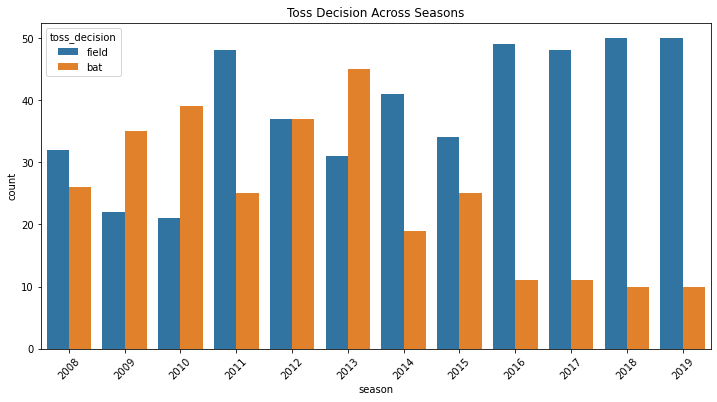

In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='season', hue='toss_decision')
plt.title('Toss Decision Across Seasons')
plt.xticks(rotation=45)
plt.show()


### 19) Find the Dismissal Kind and Visualize using best fit graph


### 20) Find the Top 10 run scorers in IPL and Visualize using best fit graph


### 21) Visualize the Highest MOM award winners


CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64


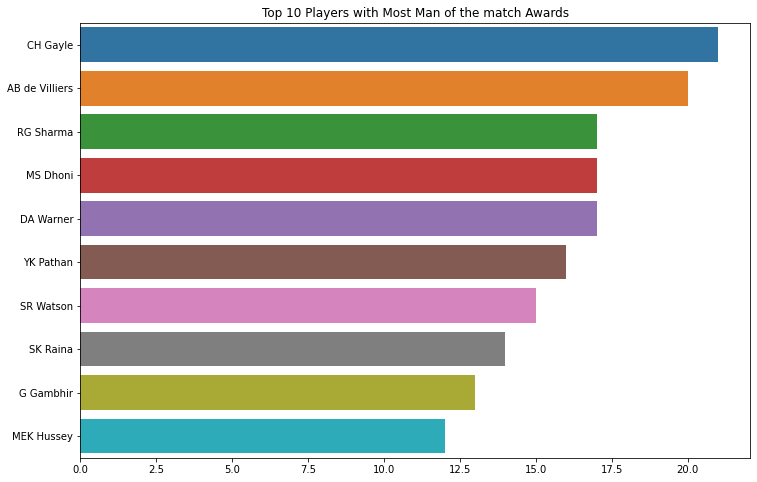

In [56]:
man = df['player_of_match'].value_counts().nlargest(10)
print(man)

plt.figure(figsize=(12, 8))
sns.barplot(x=man.values, y=man.index)
plt.title('Top 10 Players with Most Man of the match Awards')
plt.show()

### 22) Find Total Number of Played Matches by each team


In [57]:
total_matches_by_team = df['team1'].append(df['team2']).value_counts()
print(total_matches_by_team)

Mumbai Indians                 187
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Kings XI Punjab                176
Chennai Super Kings            164
Delhi Daredevils               161
Rajasthan Royals               147
Sunrisers Hyderabad            108
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Rising Pune Supergiant          16
Delhi Capitals                  16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
dtype: int64


C:\Users\mca\AppData\Local\Temp\ipykernel_8824\3966383780.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_matches_by_team = df['team1'].append(df['team2']).value_counts()


### 23)Compare Total Played Matches vs Winning Matches vs Win Rate

                             Matches Played  Matches Won  Win Rate
Chennai Super Kings                     164          100  0.609756
Deccan Chargers                          75           29  0.386667
Delhi Capitals                           16           10  0.625000
Delhi Daredevils                        161           67  0.416149
Gujarat Lions                            30           13  0.433333
Kings XI Punjab                         176           82  0.465909
Kochi Tuskers Kerala                     14            6  0.428571
Kolkata Knight Riders                   178           92  0.516854
Mumbai Indians                          187          109  0.582888
Pune Warriors                            46           12  0.260870
Rajasthan Royals                        147           75  0.510204
Rising Pune Supergiant                   16           10  0.625000
Rising Pune Supergiants                  14            5  0.357143
Royal Challengers Bangalore             180           84  0.46

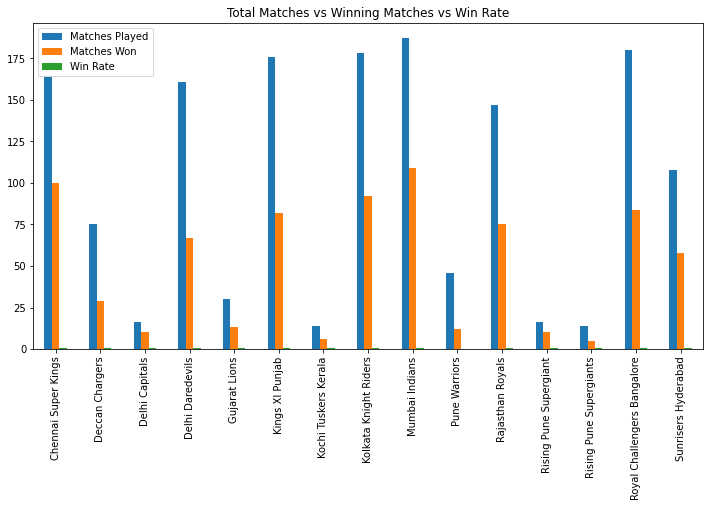

In [59]:
matches_played = total_matches_by_team
matches_won = df['winner'].value_counts()
win_rate = matches_won / matches_played

team_stats = pd.DataFrame({
    'Matches Played': matches_played,
    'Matches Won': matches_won,
    'Win Rate': win_rate
}).fillna(0)

print(team_stats)

team_stats.plot(kind='bar', figsize=(12, 6))
plt.title('Total Matches vs Winning Matches vs Win Rate')
plt.show()


### 24) Find the Distribution of Won the Matches

normal       743
tie            9
no result      4
Name: result, dtype: int64


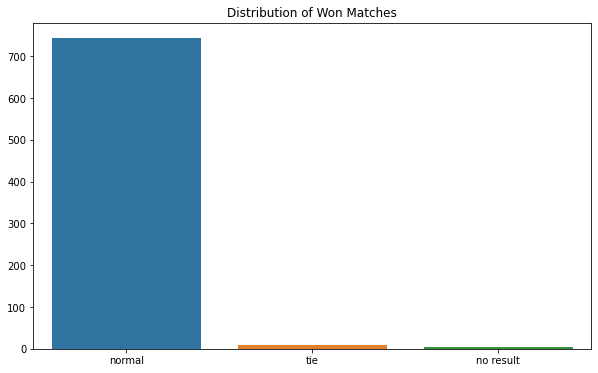

In [61]:
won_matches_distribution = df['result'].value_counts()
print(won_matches_distribution)

plt.figure(figsize=(10, 6))
sns.barplot(x=won_matches_distribution.index, y=won_matches_distribution.values)
plt.title('Distribution of Won Matches')
plt.show()


### 25)Ratio between Total Matches and Win Matches


In [62]:
win_ratios = matches_won / matches_played
print(win_ratios)

Chennai Super Kings            0.609756
Deccan Chargers                0.386667
Delhi Capitals                 0.625000
Delhi Daredevils               0.416149
Gujarat Lions                  0.433333
Kings XI Punjab                0.465909
Kochi Tuskers Kerala           0.428571
Kolkata Knight Riders          0.516854
Mumbai Indians                 0.582888
Pune Warriors                  0.260870
Rajasthan Royals               0.510204
Rising Pune Supergiant         0.625000
Rising Pune Supergiants        0.357143
Royal Challengers Bangalore    0.466667
Sunrisers Hyderabad            0.537037
dtype: float64


### 26) What is the choice of each team after winning the toss?

toss_decision                bat
toss_winner                     
Chennai Super Kings           48
Deccan Chargers               24
Delhi Capitals                 2
Delhi Daredevils              29
Gujarat Lions                  1
Kings XI Punjab               26
Kochi Tuskers Kerala           3
Kolkata Knight Riders         30
Mumbai Indians                44
Pune Warriors                 11
Rajasthan Royals              32
Rising Pune Supergiants        3
Royal Challengers Bangalore   20
Sunrisers Hyderabad           20


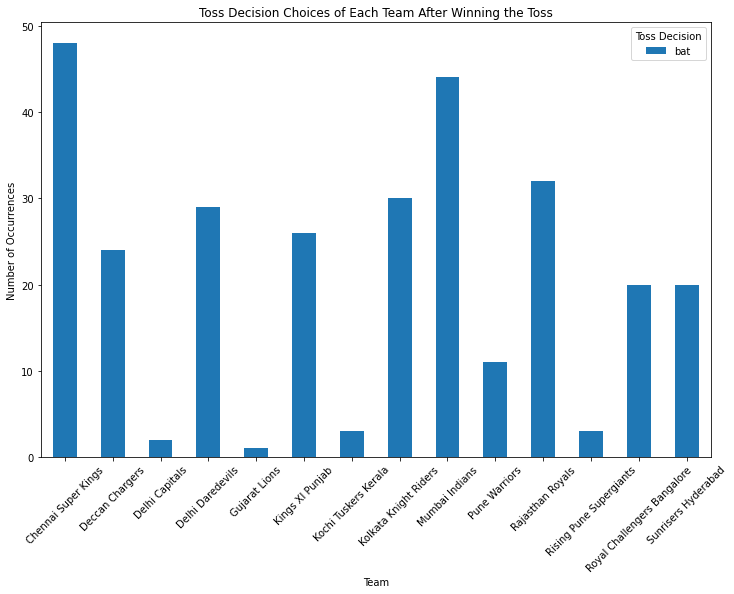

In [65]:
toss_winners_choices = df[df['toss_winner'] == df['team1']]
toss_decision_choices = toss_winners_choices.groupby('toss_winner')['toss_decision'].value_counts().unstack()
toss_decision_choices = toss_decision_choices.fillna(0)
print(toss_decision_choices)

toss_decision_choices.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Toss Decision Choices of Each Team After Winning the Toss')
plt.xlabel('Team')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.legend(title='Toss Decision')
plt.show()
